In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import glob
homedir = os.path.expanduser('~')

In [3]:
nobs=14
chipmods = {}
chiplams = {}
chisq = {}
vsini = {}
rv = {}
lld = {}
wcoef = {}
modellist = []
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/Callie/IGRINS_W1049B_K_binned_chipmods_*.fits")):
    modelname = f.split("_")[-1][:12]
    chipmods[modelname] = fits.getdata(f)
    modellist.append(modelname)
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/Callie/IGRINS_W1049B_K_binned_chiplams_*.fits")):
    modelname = f.split("_")[-1][:12]
    chiplams[modelname] = fits.getdata(f)
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/Callie/IGRINS_W1049B_K_binned_*.txt")):
    modelname = f.split("_")[-1][:12]
    results = Table.read(f, format='ascii')
    chisq[modelname] = results['chisq']
    vsini[modelname] = results['vsini']
    rv[modelname] = results['rv']
    lld[modelname] = results['lld']
    wcoef[modelname] = results['wcoef']
chisq.keys()

dict_keys(['t1400g1000f1', 't1400g1000f2', 't1400g1000f3', 't1400g1000f4', 't1400g1000f8', 't1400g1000nc', 't1500g1000f1', 't1500g1000f2', 't1500g1000f3', 't1500g1000f4', 't1500g1000f8', 't1500g1000nc'])

In [124]:
nk=200
np.arange(np.floor(-nk/2.+.5), np.floor(nk/2.+.5))

array([-100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
        -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,  -83.,
        -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,  -74.,
        -73.,  -72.,  -71.,  -70.,  -69.,  -68.,  -67.,  -66.,  -65.,
        -64.,  -63.,  -62.,  -61.,  -60.,  -59.,  -58.,  -57.,  -56.,
        -55.,  -54.,  -53.,  -52.,  -51.,  -50.,  -49.,  -48.,  -47.,
        -46.,  -45.,  -44.,  -43.,  -42.,  -41.,  -40.,  -39.,  -38.,
        -37.,  -36.,  -35.,  -34.,  -33.,  -32.,  -31.,  -30.,  -29.,
        -28.,  -27.,  -26.,  -25.,  -24.,  -23.,  -22.,  -21.,  -20.,
        -19.,  -18.,  -17.,  -16.,  -15.,  -14.,  -13.,  -12.,  -11.,
        -10.,   -9.,   -8.,   -7.,   -6.,   -5.,   -4.,   -3.,   -2.,
         -1.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,

In [150]:
dv

array([ 201.  ,  198.99,  196.98,  194.97,  192.96,  190.95,  188.94,
        186.93,  184.92,  182.91,  180.9 ,  178.89,  176.88,  174.87,
        172.86,  170.85,  168.84,  166.83,  164.82,  162.81,  160.8 ,
        158.79,  156.78,  154.77,  152.76,  150.75,  148.74,  146.73,
        144.72,  142.71,  140.7 ,  138.69,  136.68,  134.67,  132.66,
        130.65,  128.64,  126.63,  124.62,  122.61,  120.6 ,  118.59,
        116.58,  114.57,  112.56,  110.55,  108.54,  106.53,  104.52,
        102.51,  100.5 ,   98.49,   96.48,   94.47,   92.46,   90.45,
         88.44,   86.43,   84.42,   82.41,   80.4 ,   78.39,   76.38,
         74.37,   72.36,   70.35,   68.34,   66.33,   64.32,   62.31,
         60.3 ,   58.29,   56.28,   54.27,   52.26,   50.25,   48.24,
         46.23,   44.22,   42.21,   40.2 ,   38.19,   36.18,   34.17,
         32.16,   30.15,   28.14,   26.13,   24.12,   22.11,   20.1 ,
         18.09,   16.08,   14.07,   12.06,   10.05,    8.04,    6.03,
          4.02,    2

(10, 40, 30, 1.0149253731343282, 0.9950248756218905)

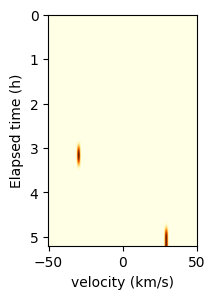

In [187]:
plt.figure(figsize=(6,3))
nobs = 14
nk = 51
dbeta=6.7e-6
dv = - dbeta*3e5 * np.arange(np.floor(-nk/2.+.5), np.floor(nk/2.+.5))
vsini=30
period = 5.2
arr = np.ones((nobs, nk))
start = int(nk/2 - (vsini/dv.max()) * nk/2)
end = int(nk/2 + (vsini/dv.max()) * nk/2)
arr[8, start] = 0.5
arr[13, end] = 0.5
plt.imshow(arr[:,:], 
        extent=(dv.min(), dv.max(), period, 0),
        aspect=int(vsini),
        cmap='YlOrBr_r')
plt.xlabel("velocity (km/s)")
plt.ylabel("Elapsed time (h)")
start, end, end-start, nk/dv.max(), 2/(dbeta*3e5)

In [137]:
1/45000

2.2222222222222223e-05

In [188]:
1/100000

1e-05

In [45]:
dbeta * 3e5

2.0100000000000002

In [75]:
nk = 101
dbeta=5e-06
dv = - dbeta*3e5 * np.arange(np.floor(-nk/2.+.5), np.floor(nk/2.+.5))


array([ 75. ,  73.5,  72. ,  70.5,  69. ,  67.5,  66. ,  64.5,  63. ,
        61.5,  60. ,  58.5,  57. ,  55.5,  54. ,  52.5,  51. ,  49.5,
        48. ,  46.5,  45. ,  43.5,  42. ,  40.5,  39. ,  37.5,  36. ,
        34.5,  33. ,  31.5,  30. ,  28.5,  27. ,  25.5,  24. ,  22.5,
        21. ,  19.5,  18. ,  16.5,  15. ,  13.5,  12. ,  10.5,   9. ,
         7.5,   6. ,   4.5,   3. ,   1.5,  -0. ,  -1.5,  -3. ,  -4.5,
        -6. ,  -7.5,  -9. , -10.5, -12. , -13.5, -15. , -16.5, -18. ,
       -19.5, -21. , -22.5, -24. , -25.5, -27. , -28.5, -30. , -31.5,
       -33. , -34.5, -36. , -37.5, -39. , -40.5, -42. , -43.5, -45. ,
       -46.5, -48. , -49.5, -51. , -52.5, -54. , -55.5, -57. , -58.5,
       -60. , -61.5, -63. , -64.5, -66. , -67.5, -69. , -70.5, -72. ,
       -73.5, -75. ])